In [1]:
#importing the necessary libaries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt # For basic data visualization
import matplotlib.ticker as mticker # For basic data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.preprocessing import LabelEncoder #For label encoding categorical variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #For splitting the data into train and test
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random forest Classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree classifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # For model evaluation
from sklearn.metrics import roc_curve, auc #roc_curve plot 

In [2]:
dataFrame = pd.read_csv('Transactions Data.csv')

In [3]:
dataFrame.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
# requesting to view the first 5 rows of the dataset
dataFrame.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# requesting to view the last 5 rows of the dataset
dataFrame.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
# viewing the dataset type information
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# looking for statistics of the dataset
dataFrame.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Check for missing values
dataFrame.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
#check the datatypes we have on our dataset 
dataFrame.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
print('Number of duplicates are : ', dataFrame.duplicated().sum())

Number of duplicates are :  0


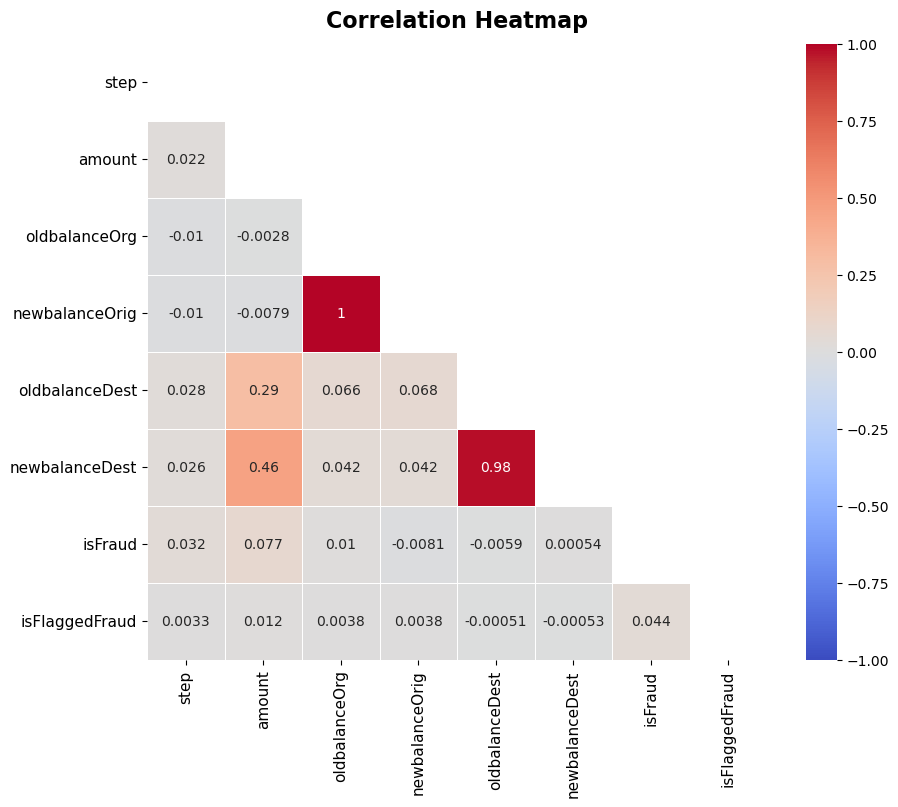

In [11]:
data_h = dataFrame[['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data_h.corr(numeric_only=True), dtype=np.bool_))
heatmap = sns.heatmap(data_h.corr(numeric_only=True), 
                      mask=mask, 
                      vmin=-1, 
                      vmax=1, 
                      center=0, 
                      annot=True, 
                      cmap="coolwarm",  # You can change the colormap if needed
                      linewidths=.5)
heatmap.set_title('Correlation Heatmap', pad=12, fontsize=16, fontweight='bold')
heatmap.tick_params(axis='both', labelsize=11)
plt.show()

In [12]:
#correlation matrix 
data_h.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


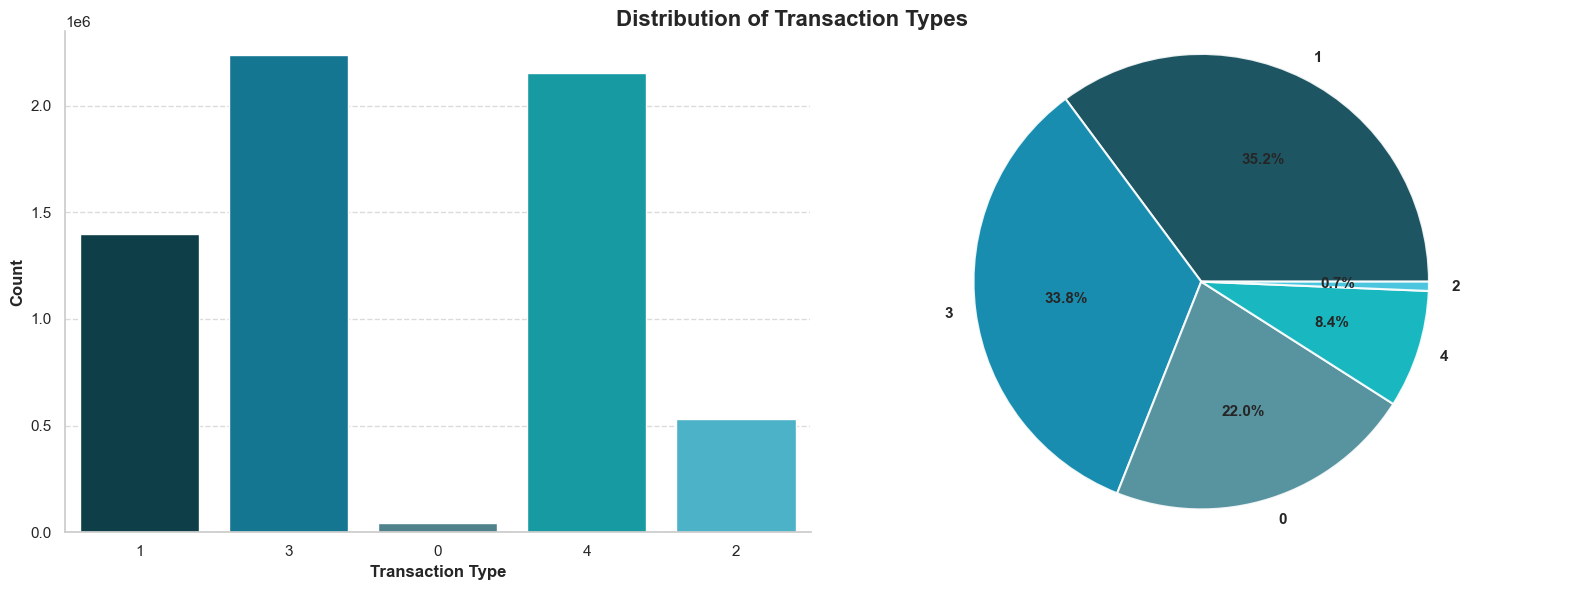

In [24]:
# Count the number of each Transaction Type
transaction_type_counts = dataFrame['type'].value_counts()

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, ax=ax1, palette=['#044451','#0081a7', '#468896','#00afb9','#38c0db'])
ax1.set_xlabel('Transaction Type', fontsize=12,fontweight = 'bold')
ax1.set_ylabel('Count', fontsize=12,fontweight = 'bold')
ax1.set_xticklabels(transaction_type_counts.index,  fontsize=11)
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(ax=ax1)

# Pie chart
# colors = ['#f07167', '#f3b562']
colors = ['#044451','#0081a7',  '#468896','#00afb9','#38c0db']
wedges, texts, autotexts = ax2.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=0, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
ax2.axis('equal')

# Beautify the pie chart labels
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Adding shadow to pie chart
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1.5)
    wedge.set_alpha(0.9)

# Adjust layout spacing between plots
plt.tight_layout()

# Set a single title for the entire figure
fig.suptitle('Distribution of Transaction Types', fontsize=16, fontweight='bold')
plt.show()

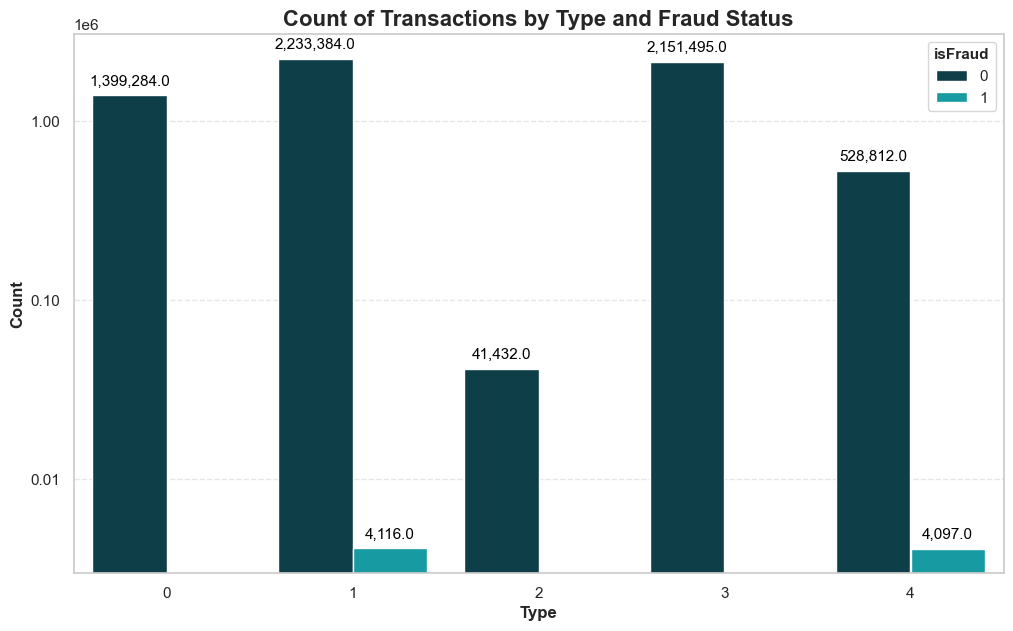

In [25]:
# Set the style and context
sns.set_style('whitegrid')
sns.set_context('notebook')

# Create a figure and axes
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=dataFrame, x='type', hue='isFraud', palette=['#044451', '#00afb9'])

# Set labels and title
ax.set_xlabel('Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.title('Count of Transactions by Type and Fraud Status', fontsize=16, fontweight='bold')

# Beautify legend
legend = ax.legend(title='isFraud', title_fontsize='11', loc='upper right')
legend.get_title().set_fontweight('bold')

# Beautify ticks and grid
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)


# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# Add a subtle background grid to enhance readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

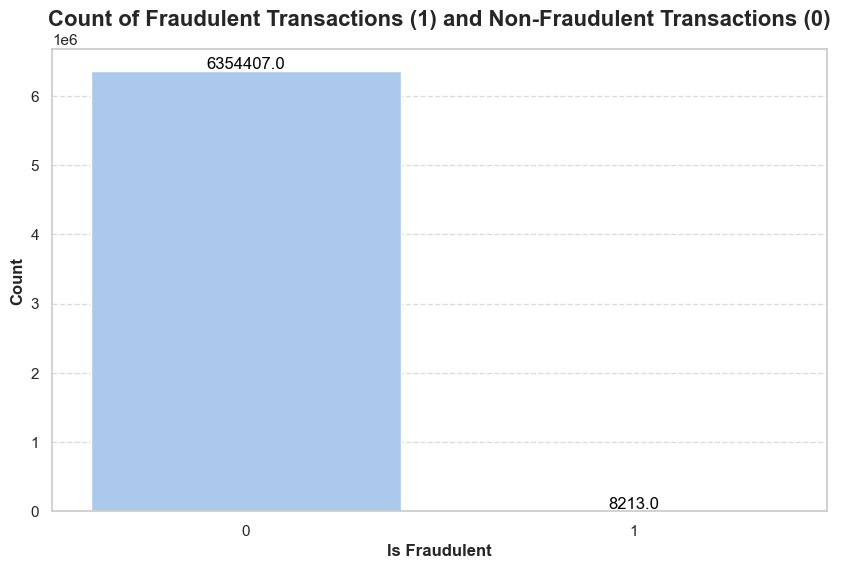

In [26]:
plt.figure(figsize=(10, 6))

# Create the count plot
countplot = sns.countplot(x='isFraud', data=dataFrame, palette='pastel')

# Set labels and title
countplot.set_title('Count of Fraudulent Transactions (1) and Non-Fraudulent Transactions (0)', fontsize=16, fontweight='bold')
countplot.set_xlabel('Is Fraudulent', fontsize=12, fontweight='bold')
countplot.set_ylabel('Count', fontsize=12, fontweight='bold')

# Beautify ticks and grid
countplot.tick_params(axis='both', labelsize=11)
countplot.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

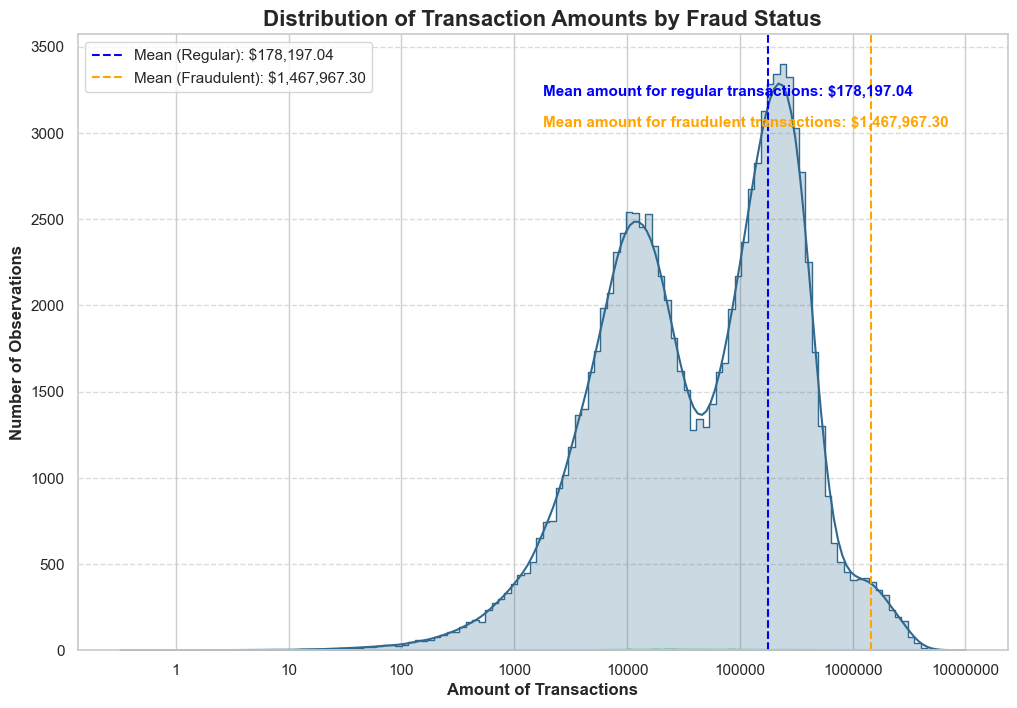

In [27]:
plt.figure(figsize=(12, 8))

# Create the histogram plot
histplot = sns.histplot(data=dataFrame[:100000], 
                        x='amount', 
                        hue='isFraud', 
                        kde=True, 
                        element='step', 
                        palette='viridis',
                        log_scale=True)

# Set labels and title
histplot.set_ylabel('Number of Observations', fontsize=12, fontweight='bold')
histplot.set_xlabel('Amount of Transactions', fontsize=12, fontweight='bold')
plt.title('Distribution of Transaction Amounts by Fraud Status', fontsize=16, fontweight='bold')

# Add vertical lines for mean values
mean_value_f = dataFrame[dataFrame['isFraud'] == False]['amount'].mean()
mean_value_t = dataFrame[dataFrame['isFraud'] == True]['amount'].mean()
histplot.axvline(x=mean_value_f, color='blue', linestyle='--', label=f'Mean (Regular): ${mean_value_f:,.2f}')
histplot.axvline(x=mean_value_t, color='orange', linestyle='--', label=f'Mean (Fraudulent): ${mean_value_t:,.2f}')

# Add annotations for mean values
histplot.annotate(f'Mean amount for regular transactions: ${mean_value_f:,.2f}', 
                  xy=(0.5, 0.9),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='blue')
histplot.annotate(f'Mean amount for fraudulent transactions: ${mean_value_t:,.2f}', 
                  xy=(0.5, 0.85),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='orange')
histplot.xaxis.set_major_formatter(mticker.ScalarFormatter())
histplot.ticklabel_format(style='plain', axis='x')
histplot.tick_params(axis='both', labelsize=11)
histplot.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

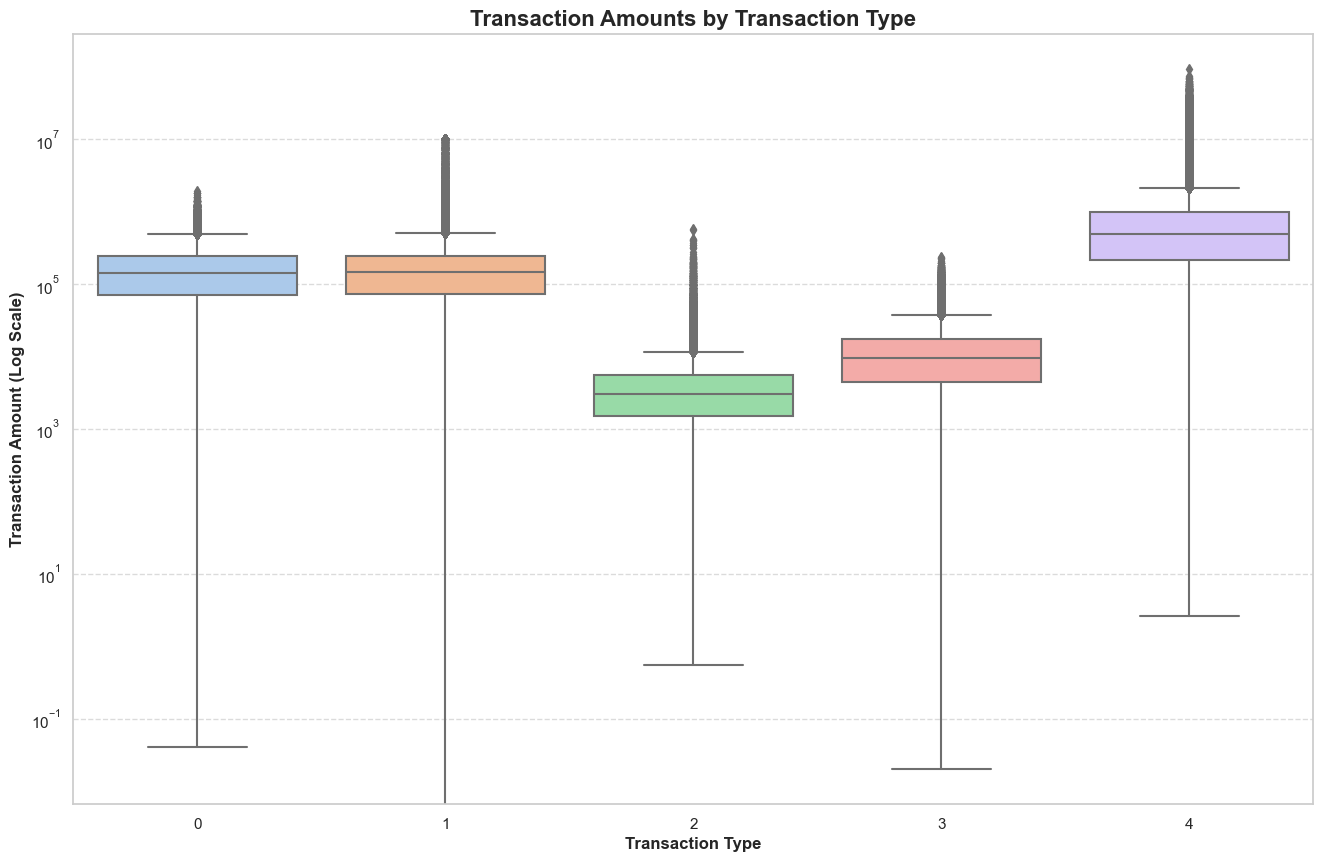

In [28]:
plt.figure(figsize=(16, 10))
boxplot = sns.boxplot(x='type', y='amount', data=dataFrame, palette='pastel')
boxplot.set_title('Transaction Amounts by Transaction Type', fontsize=16, fontweight='bold')
boxplot.set_xlabel('Transaction Type', fontsize=12, fontweight='bold')
boxplot.set_ylabel('Transaction Amount (Log Scale)', fontsize=12, fontweight='bold')
boxplot.set_yscale('log')
boxplot.tick_params(axis='both', labelsize=11)
boxplot.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [29]:
#datatypes of the dataset attributes
dataFrame.dtypes

step                int64
type                int32
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [30]:
#encode the string objects to the categorical values to numerical values
encoder = {}
for i in dataFrame.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    dataFrame[i] = encoder[i].fit_transform(dataFrame[i])

In [31]:
x = dataFrame.drop(columns=['isFraud'])
y = dataFrame['isFraud']

In [32]:
#scale the dataset
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [33]:
# Split the data into features (X) and labels (y)
X = dataFrame[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y= dataFrame['isFraud']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [35]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5090096, 8)
Training Labels Shape: (5090096,)
Testing Features Shape: (1272524, 8)
Testing Labels Shape: (1272524,)


In [36]:
#Initialize and train one of the K-Nearest Neighbors Model for Classification of Fraud Transaction
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
#predict the model and classify the results on the test data
knn_predictions = knn_classifier.predict(X_test)

In [38]:
#calculate the accuracy for the KNN model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy for the K-Nearest Neighbors Model : {:.2f}%".format(knn_accuracy * 100))

Accuracy for the K-Nearest Neighbors Model : 99.92%


In [39]:
#classification Report
print("Classification Report For KNN Model:\n ",classification_report(y_test,knn_predictions))

Classification Report For KNN Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.81      0.54      0.65      1641

    accuracy                           1.00   1272524
   macro avg       0.90      0.77      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [40]:
#confusion matrix of K-Nearest Neighbors Model
knn_confusion_matrix=confusion_matrix(y_test,knn_predictions)

In [41]:
# Initialize and train one of the Decision Tree Model for Classification of Fraud Transaction
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
#predict the model and classify the results on the test data
dt_predictions = dt_classifier.predict(X_test)

In [43]:
#calculate the accuracy for the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy for the Decision Tree Model : {:.2f}%".format(dt_accuracy * 100))

Accuracy for the Decision Tree Model : 99.97%


In [44]:
#classification Report
print("Classification Report For Decision Tree Model:\n ",classification_report(y_test,dt_predictions))

Classification Report For Decision Tree Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.86      0.87      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [45]:
#confusion matrix of Decision Tree Model
dt_confusion_matrix=confusion_matrix(y_test,dt_predictions)

In [46]:
#Initialize and train one of the (Logistic Regression Model) for Classification of Fraud Transaction
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train,y_train)

LogisticRegression()

In [47]:
#predict the model and classify the results on the test data
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [48]:
#calculate the accuracy for the Logistic Regression model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Accuracy for the Logistic Regression Model : {:.2f}%".format(logistic_regression_accuracy * 100))

Accuracy for the Logistic Regression Model : 99.89%


In [49]:
#classification Report
print("Classification Report For Logistic Regression Model:\n ",classification_report(y_test,logistic_regression_predictions))

Classification Report For Logistic Regression Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.62      0.36      0.46      1641

    accuracy                           1.00   1272524
   macro avg       0.81      0.68      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



In [50]:
#confusion matrix of Logistic Regression Model
logistic_regression_confusion_matrix=confusion_matrix(y_test,logistic_regression_predictions)

In [51]:
#Initialize and train one of the (Random Forest Model) for Classification of Fraud Transaction
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#predict the model and classify the results on the test data
random_forest_predictions = random_forest_model.predict(X_test)

In [53]:
#calculate the accuracy for the Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Accuracy for the Random Forest Model : {:.2f}%".format(random_forest_accuracy * 100))

Accuracy for the Random Forest Model : 99.97%


In [54]:
#classification Report
print("Classification Report For (Random Forest) Model:\n ",classification_report(y_test,random_forest_predictions))

Classification Report For (Random Forest) Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.97      0.77      0.86      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [55]:
#confusion matrix of Random Forest Model
rdf_confusion_matrix=confusion_matrix(y_test,random_forest_predictions)

In [56]:
# models
models = {
    "K-Nearest Neighbors (KNN)": knn_classifier,
    "Decision Tree": dt_classifier,
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model
}

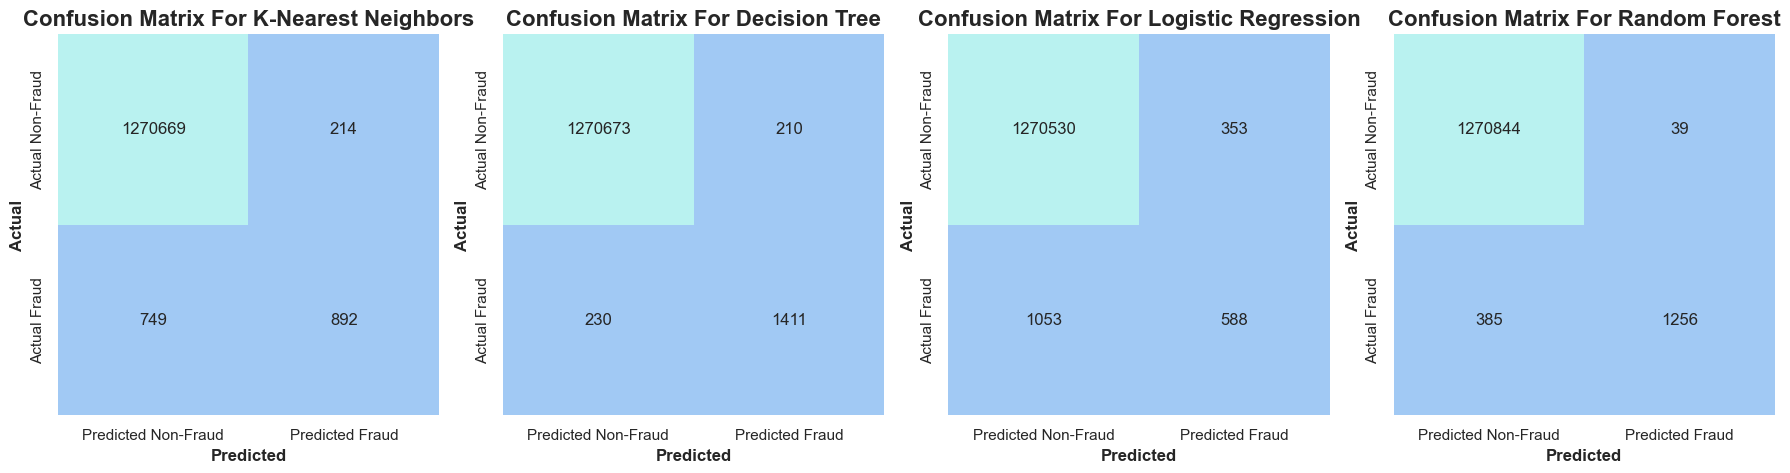

In [57]:
# Create a dictionary to hold the confusion matrices for each model
confusion_matrices = {'K-Nearest Neighbors': knn_confusion_matrix,
                      'Decision Tree': dt_confusion_matrix,
                      'Logistic Regression': logistic_regression_confusion_matrix,
                      'Random Forest': rdf_confusion_matrix
                      }

# custom color palette suitable for financial visualization
custom_palette = sns.color_palette("pastel", as_cmap=True)

# figure for the confusion matrices
plt.figure(figsize=(18, 18))

# Iterate through the confusion matrices and plot them
for i, (label, conf_matrix) in enumerate(confusion_matrices.items()):
    plt.subplot(4, 4, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette, cbar=False, square=True,
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    
    plt.title(f'Confusion Matrix For {label}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12, fontweight='bold')
    plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

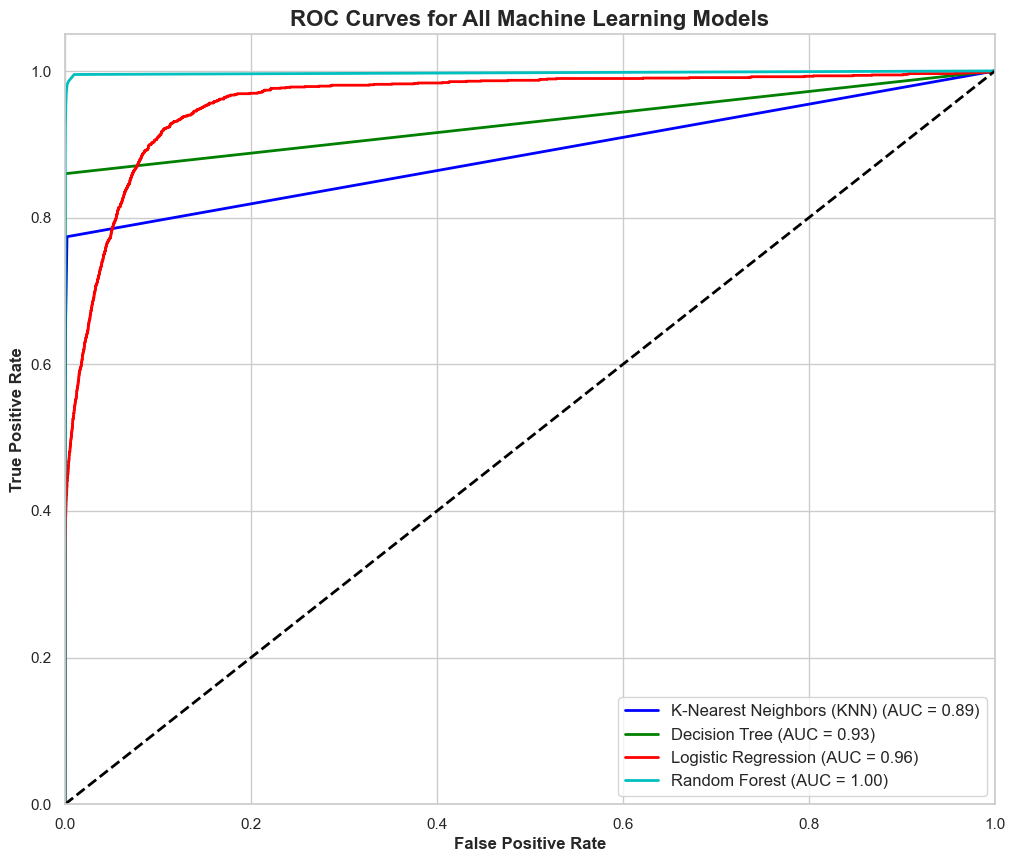

In [58]:
# figure for ROC AUC curves
plt.figure(figsize=(12, 10))

# colors for each model's curve
colors = ['b', 'g', 'r', 'c']

# Iterate through each model and plot ROC AUC curve
for i, (label, model) in enumerate(models.items()):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC AUC curves with distinct colors
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})', color=colors[i])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves for All Machine Learning Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.show()
